In [1]:
#! /usr/bin/env python

import sys, os.path
from aubio import pvoc, source, float_type
from numpy import zeros, log10, vstack
import matplotlib.pyplot as plt



In [4]:
def get_spectrogram(filename, samplerate = 0):
    win_s = 512                                        # fft window size
    hop_s = win_s // 2                                 # hop size
    fft_s = win_s // 2 + 1                             # spectrum bins

    a = source(filename, samplerate, hop_s)            # source file
    if samplerate == 0: samplerate = a.samplerate
    pv = pvoc(win_s, hop_s)                            # phase vocoder
    specgram = zeros([0, fft_s], dtype=float_type)     # numpy array to store spectrogram

    # analysis
    while True:
        samples, read = a()                              # read file
        specgram = vstack((specgram,pv(samples).norm))   # store new norm vector
        if read < a.hop_size: break

    # plotting
    fig = plt.imshow(log10(specgram.T + .001), origin = 'bottom', aspect = 'auto', cmap=plt.cm.gray_r)
    ax = fig.axes
    ax.axis([0, len(specgram), 0, len(specgram[0])])
    # show axes in Hz and seconds
    time_step = hop_s / float(samplerate)
    total_time = len(specgram) * time_step
    outstr = "total time: %0.2fs" % total_time
    print(outstr + ", samplerate: %.2fkHz" % (samplerate / 1000.))
    n_xticks = 10
    n_yticks = 10

    def get_rounded_ticks( top_pos, step, n_ticks ):
        top_label = top_pos * step
        # get the first label
        ticks_first_label = top_pos * step / n_ticks
        # round to the closest .1
        ticks_first_label = round ( ticks_first_label * 10. ) / 10.
        # compute all labels from the first rounded one
        ticks_labels = [ ticks_first_label * n for n in range(n_ticks) ] + [ top_label ]
        # get the corresponding positions
        ticks_positions = [ ticks_labels[n] / step for n in range(n_ticks) ] + [ top_pos ]
        # convert to string
        ticks_labels = [  "%.1f" % x for x in ticks_labels ]
        # return position, label tuple to use with x/yticks
        return ticks_positions, ticks_labels
  
    # apply to the axis
    x_ticks, x_labels = get_rounded_ticks ( len(specgram), time_step, n_xticks )
    y_ticks, y_labels = get_rounded_ticks ( len(specgram[0]), (samplerate / 1000. / 2.) / len(specgram[0]), n_yticks )
    ax.set_xticks( x_ticks )
    ax.set_yticks ( y_ticks )
    ax.set_xticklabels( x_labels )
    ax.set_yticklabels ( y_labels )
    ax.set_ylabel('Frequency (kHz)')
    ax.set_xlabel('Time (s)')
    ax.set_title(os.path.basename(filename))
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
            ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize('x-small')
    return fig



In [7]:
fig = get_spectrogram("Data/test.wav")

total time: 246.29s, samplerate: 44.10kHz


In [8]:
%config InlineBackend.figure_format='retina'
width = 24
height = 24
plt.figure(figsize=(width, height))

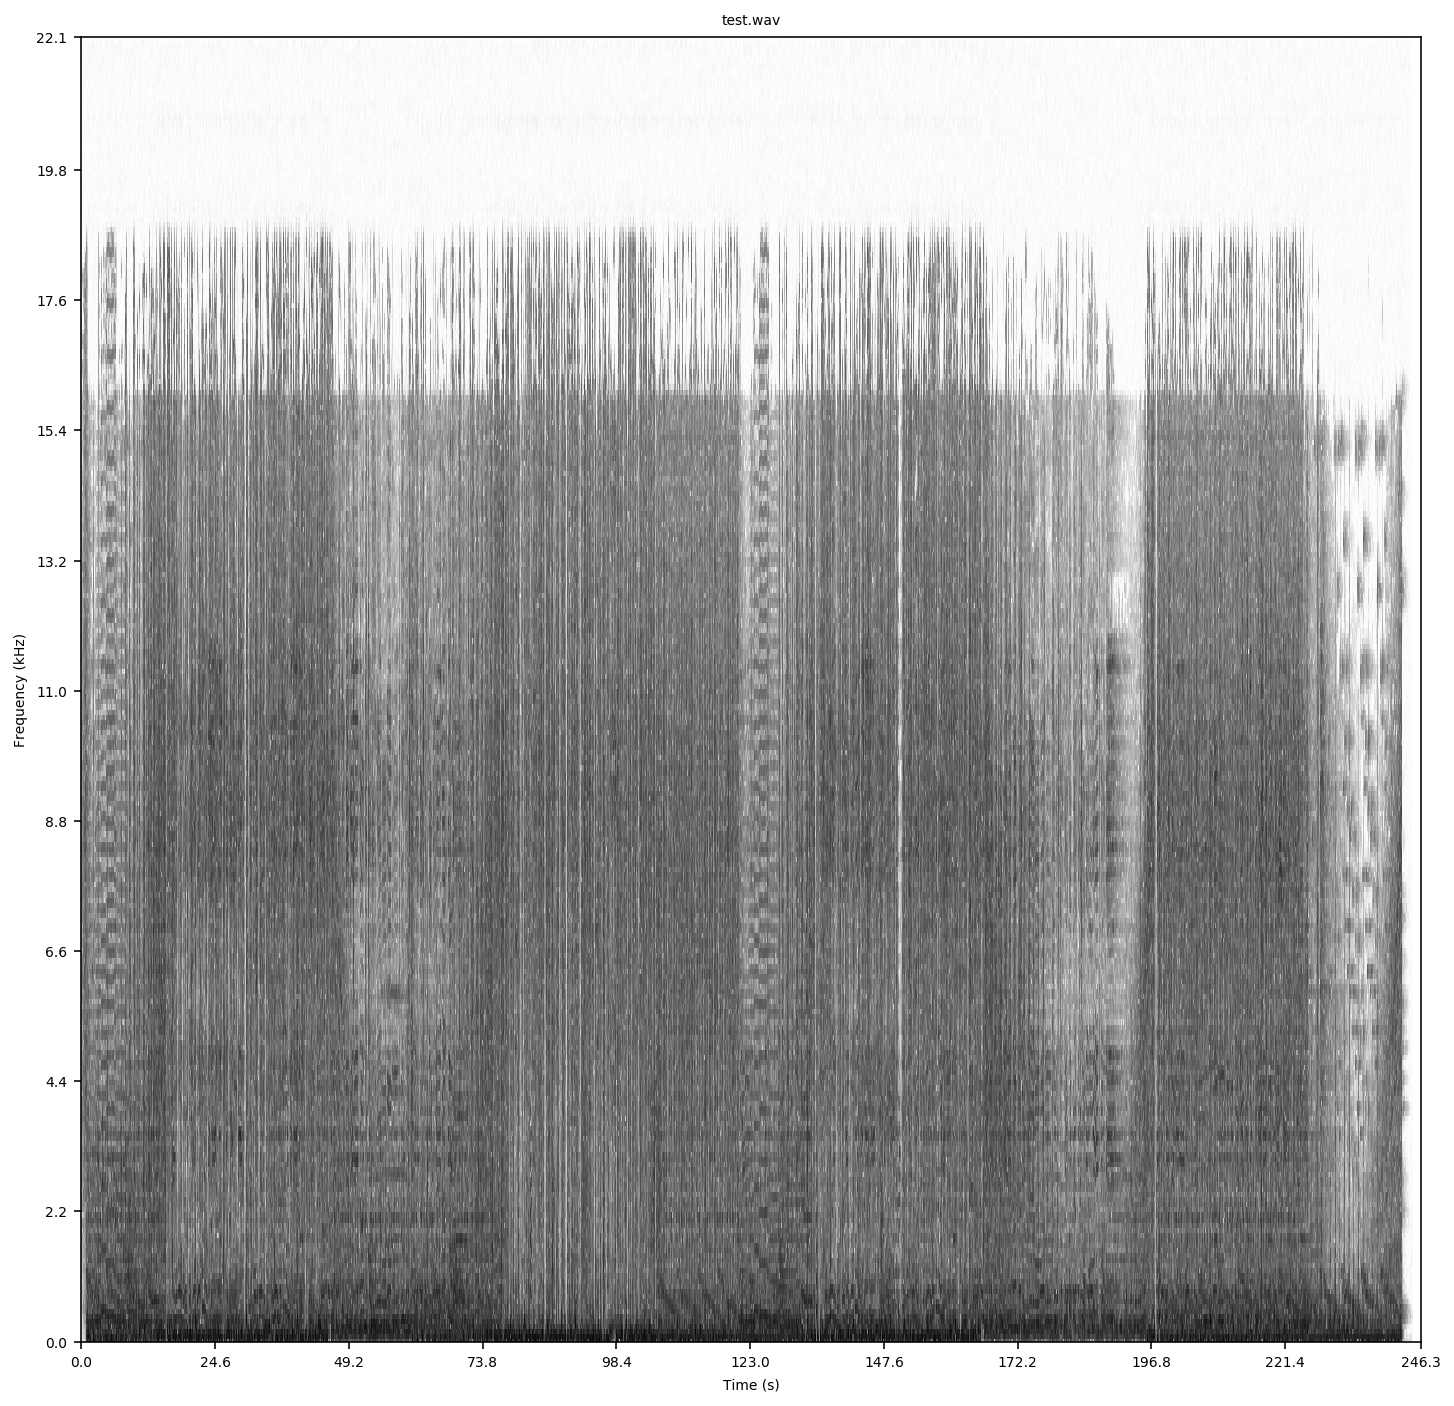

In [9]:
plt.figure(figsize=(width, height))
# display graph
plt.show()
#outimage = os.path.basename(soundfile) + '.png'
#print ("writing: " + outimage)
#plt.savefig(outimage)
plt.close()